# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.1: Distributions and Random Processes

### 1.1.4: Normality Tests

If you are analysing data on the assumption it is normally distributed, you should test that assumption first. Properties of normal distributions do not necessarily apply to data that has a different underlying distribution. As an example, an ANOVA test assumes normality in your data, and the results of an ANOVA are not valid if the data comes from some other source.

There are a number of normality tests that provide a way for us to determine if it is likely that the data comes from a normal distribution.

One method of testing for normality is to compute the skew and kurtosis of the data. A standard normal distribution has a skew of 0 and a kurtosis of 3.

In [5]:
%run setup.ipy

In [5]:
#aapl = pd.read_hdf("data/AAPL.h5") # this function generates error, so using another method to load data

import h5py
f_aapl = h5py.File("data/AAPL.h5")["AAPL"]
aapl = pd.DataFrame(np.array(f_aapl["block0_values"])) 
aapl.columns = ["Open", "High", "Low", "Close", "Adj Close"]
aapl["Volume"] = np.array(f_aapl["block1_values"])
aapl = aapl.set_index(pd.to_datetime(np.array(f_aapl["axis1"])))

In [6]:
aapl['Gain'] = aapl['Adj Close'].diff()
aapl.dropna(inplace=True)

In [7]:
stats.skew(aapl['Gain'])

0.49966243998511045

In [8]:
stats.kurtosis(aapl['Gain'])

20.448973653158085

The AAPL stock price increases do not appear to have a normal distribution based on this data. Let's have a look at the histogram again:

In [10]:
alt.Chart(aapl).mark_bar().encode(
        alt.X("Gain", bin=alt.Bin(maxbins=100)),
        y='count()',
    )

alt.Chart(...)

A high Kurtosis is obtained from very "sharp" peaks such as this one. The skew is not that high, but is positive, indicating a right-leaning distribution.

More objective tests are available in the `scipy.stats` package. For instance, the Shapiro-Wilk test is commonly used and is a good test for small to medium datasets, with up to a few thousand data points.

In [11]:
statistic, p = stats.shapiro(aapl['Gain'])

In [12]:
p  # Compare the p value to your acceptable alpha value to determine if the null hypothesis can be rejected.

0.0

In [13]:
if p > 0.05:
    print("The data looks like it was drawn from a normal distribution")
else:
    print("The data does not look like it was drawn from a normal distribution")

The data does not look like it was drawn from a normal distribution


### What is a p-value?

The p-value above is a commonly used term to describe the probability of your test being true.

As it is a probability, it has a value between 0 and 1. Values near 0 indicate that your test is "not likely to be true" and values near 1 indicate that your test is likely to be true. Often, we apply a threshold, and if our p value is greater than that threshold, we accept the outcome as "likely enough, and we continue as if it were true", that is, we accept the outcome of the test as a "positive".

It is very common to use a threshold of 0.05 when performing a test. That is, if our test has a greater than 95% chance of being true, we accept it as such. While this is an adequate rule of thumb, it is not a one-size-fits-all solution to the problem of choosing a p value threshold.

Where this is normally seen in classical statistics is with a Null, and Alternative hypothesis. We will delve into these deeper later, but as this is used above, the null hypothesis is our "nothing is surprising" hypothesis, and the alternative is "there is something interesting here". For the Shapiro-Wilk used above, the hypothesis are:

* $H_0$ (the Null hypothesis): The data is drawn from a normal distribution
* $H_A$ (the Alternative hypothesis): The data was not drawn from a normal distribution

Here we have mutually exclusive tests. If we get a value of $a$ for our Null hypothesis, then the probability of our Alternative being true is $1-a$. Statisticians are a pessemistic bunch, so require a very high threshold before we reject the Null hypothesis. This is akin to requiring a very high amount of evidence to reject it. Therefore, to reject the Null hypothesis, to indicate something else is going on here, we require the p value to be less than 0.05, i.e. for there to be a greater than 95% chance the Alternative hypothesis is true.

This might seem like a high standard to meet, but humans often see patterns in data that are not there. We use statistics to test these patterns and ensure we don't fall afoul of this over confident pattern matching.

Before you decide to run a new statistical test, you should see first what the p value would tell you. Often the language is "accept the null hypothesis" or "fail to accept the null hypothesis". This will tell you how to use the test.

We could see from the Kurtosis that this dataset above wasn't normal. Let's look at a different set of data.

In [14]:
heights = np.array([
    205.61624376, 155.80577135, 202.09636984, 159.19312848,
    160.0263383 , 147.44200373, 160.96891569, 160.76304892,
    167.59165377, 164.31571823, 151.11269914, 176.43856129,
    176.88435091, 138.04177187, 183.87507305, 162.81488426,
    167.96767641, 144.68437342, 180.88771461, 179.18997091,
    189.81672505, 163.68662119, 175.70135072, 167.32793289,
    163.72509862, 207.93257342, 177.41722601, 167.28154916,
    170.26294662, 187.01142671, 178.3108478 , 168.8711774 ,
    202.77222671, 138.55043572, 187.10284379, 155.13494037,
    175.24219374, 188.54739561, 191.42024196, 174.34537673,
    158.36285104, 183.17014557, 166.36310929, 185.3415384 ,
    163.87673308, 173.70401469, 168.78499868, 167.39762991,
    166.89193943, 191.04035344, 148.02108024, 140.82772936,
    168.85378921, 142.13536543, 189.77084606, 173.7849811 ,
    157.61303804, 171.62493617, 173.30529631, 162.92083214,
    169.52974326, 142.01039665, 176.01691215, 170.32439763,
    172.64616031, 158.35076247, 185.96332979, 176.6176222 ,
    204.68516079, 161.43591954, 172.42384543, 179.36900257,
    170.01353653, 194.40269002, 139.96802012, 156.47281846,
    210.21895193, 153.30508193, 157.10282665, 200.07040619,
    174.69616438, 168.97403285, 188.9396949 , 156.19358617,
    179.56494356, 175.04014032, 164.1384659 , 167.90219562,
    184.80752625, 143.56580744, 169.80537836, 186.5894398 ,
    166.39251657, 165.65510886, 195.49137372, 152.21650272,
    163.14001055, 170.27382512, 147.63901378, 190.32910286])

In [15]:
statistic, p = stats.shapiro(heights)

In [16]:
if p > 0.05:
    print("The data looks like it was drawn from a normal distribution")
    print("p={:.3f}".format(p))
else:
    print("The data does not look like it was drawn from a normal distribution")

The data looks like it was drawn from a normal distribution
p=0.278


#### Exercise

Two other commonly used tests for normality are available in `scipy.stats`. They are `stats.normaltest` and `stats.kstest`. Review the help and references for these functions, and run them on the `heights` data. What are the strengths and weaknesses of each test?

In [18]:
statistic_chi, p_c = stats.normaltest(heights) #chi squared test statistic
statistic_k, p_k = stats.kstest(heights, cdf = 'norm') #another one?
print(str(p_c), str(p_k))

print("From Stack overflow, the Kolmogorov-Smirnov is for a completely specified distribution, while the Shapiro-Wilk is for normality, with unspecified mean and variance.")

0.6994130645220737 0.0
From Stack overflow, the Kolmogorov-Smirnov is for a completely specified distribution, while the Shapiro-Wilk is for normality, with unspecified mean and variance.


*For solutions, see `solutions/scipy_normal_tests.py`*

### Statsmodels

We will now perform a normality test using the `statsmodels` package. This package allows for higher level statistics than the `scipy` module we have been using. We will be using `statsmodels` for much of the ordinary least squares computation in future modules.

In [19]:
import statsmodels.api as sm

In [20]:
statistic, p_value = sm.stats.diagnostic.kstest_normal(heights)

In [21]:
if p_value > 0.05:
    print("The data looks like it was drawn from a normal distribution")
    print("p={:.3f}".format(p_value))
else:
    print("The data does not look like it was drawn from a normal distribution")

The data looks like it was drawn from a normal distribution
p=0.395


#### Exercise

Review the documentation for `statsmodels` at https://www.statsmodels.org and run the Jarque-Bera test for normality on this data.

In [26]:
from statsmodels.stats import stattools

jbstat, pvalue, skew, kurtosis = stattools.jarque_bera(heights)
print(pvalue, skew, kurtosis)

if pvalue < 0.05:
    print("Reject h0 that data is normal")
else:
    print("Cannot reject h0")

0.6714923453511482 0.19052726425258604 2.785620140256962
Cannot reject h0


*For solutions, see `solutions/jarque_bera.py`*

### Handling conflicts

There are many different normality tests. If you get the same result for all the tests (i.e. multiple tests suggest normal data), then you can be reasonably sure the data does come from a normal distribution.

If you get conflicting result, the results are not quite so clear. In a conflicting case, it would be unlikely that the results will be wildly different. Instead, you are likely to get a few slightly "above the line" and a few slightly "below the line". Depending on the use case, you can interpret a single "is normal" result as being good enough. Much of the later analysis you can do will be fine for "normal-like" data, rather than strictly normal data.

If you do have a very sensitive application that requires a great degree in confidence in your normality test, research further the assumptions behind different normality tests and see which are most applicable to your application. The SciPy and Statsmodels documentation contain references for each of the normality tests.

A major property is the number of samples in your dataset. Some tests work better with more samples, and some work better with fewer. We will investigate this in the last exercise for this module.

#### Exercise

We are going to investigate the relationship that sample size has with the results of a normality test. We want to test the likelihood a normality test will reject the normality hypothesis for a dataset that *actually is generated from a normal distribution*, as the sample size increases.

Write a script that:

1. Creates a normal distribution
2. Randomly samples N data points from that distribution
3. Checks for normality against four different normality tests
4. Repeats steps 1-3 a large number of times, and with varying N
5. Plot the likelihood each test fails for a given sample size.

Below is a snippet of code that runs 20 tests against one sample of data, and determines if the test determines it is normal or not. For an alpha value of 0.05, you would expect about 1 of the tests to fail on average.


In [2]:
def normality_script(sample_size, test_type, repetitions = 100):
    distribution = stats.norm()
    data = distribution.rvs(sample_size)
    
    passed = 0
    failed = 0
    for i in range(repetitions):
        distribution = stats.norm()
        data = distribution.rvs(sample_size)
    
        if test_type == "sw":
            statistic, p = stats.shapiro(data)
        elif test_type == "cs":
            statistic, p = stats.normaltest(data)
        elif test_type == "ks":
            statistic, p = stats.kstest(data, cdf = 'norm')
        elif test_type == "jb":
            statistic, p, skew, kurtosis = stattools.jarque_bera(data)
        
        if p > 0.05:
            passed += 1
        else:
            failed += 1
        
    return failed/(passed+failed)

In [3]:
import pandas as pd
from statsmodels.stats import stattools
from scipy import stats
import altair as alt
import numpy as np


#sample_sizes = [10, 30, 50, 100, 1000, 5000]
max_sample_size = 1000
sample_sizes = np.linspace(10, max_sample_size, 20, dtype=np.int)

test_types = ["sw", "cs", "ks", "jb"]
data = []

for size in sample_sizes:
    for test in test_types:
        p_fail = normality_script(size, test)
        row = [test,size,p_fail]
        data.append(row)
        

df = pd.DataFrame(data, columns=['Test', 'Sample', 'Failed'])

alt.Chart(df).mark_line().encode(
    x='Sample',
    y='Failed',
    color = 'Test'
)

C:\Users\86155\AppData\Local\Temp\ipykernel_2100\848363905.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_sizes = np.linspace(10, max_sample_size, 20, dtype=np.int)
c:\env\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


alt.Chart(...)

- You can see that the failure rate seems to be fairly random, and lies between 0.02 - 0.09 for varying samples
- The number of samples doesn't seem to affect the failure rate too much

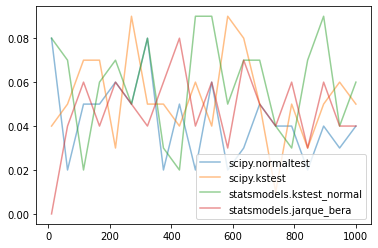

In [6]:
df = np.array(df)

plt.plot(df[df[:,0] == "sw", 1], df[df[:,0] == "sw", 2], alpha=0.5, label='scipy.normaltest')
plt.plot(df[df[:,0] == "cs", 1], df[df[:,0] == "cs", 2], alpha=0.5, label='scipy.kstest')
plt.plot(df[df[:,0] == "ks", 1], df[df[:,0] == "ks", 2], alpha=0.5, label='statsmodels.kstest_normal')
plt.plot(df[df[:,0] == "jb", 1], df[df[:,0] == "jb", 2], alpha=0.5, label='statsmodels.jarque_bera')
plt.legend()
plt.show()

*For solutions see `solutions/many_normal_tests.py`*